In [3]:
from pathlib import Path
import pandas as pd
import tifffile as tf

In [5]:
from smart_wsi_scanner.qp_utils import TifWriterUtils

In [24]:
jai__5,jai_0,jai_5,jai_90 = list(Path('debeyering_data').rglob('Fifth*.tiff'))[4:]

In [25]:
mp__5,mp_0,mp_5,mp_90 = list(Path('debeyering_data').rglob('M*.tiff'))

In [12]:
from matplotlib.pyplot import *

(1544, 2064, 3)
(2200, 2688, 3)


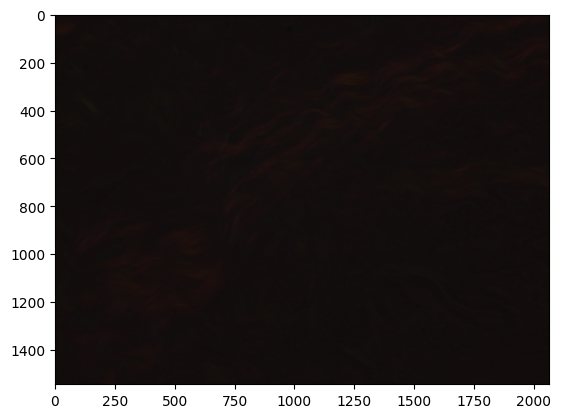

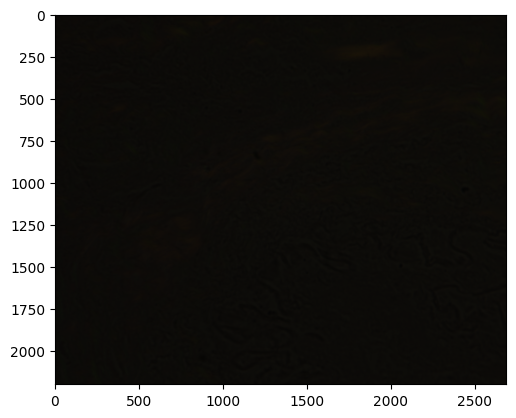

In [26]:
for filename in [jai_0, mp_0]:
    data = tf.imread(filename)
    print(data.shape)
    figure()
    imshow(data)

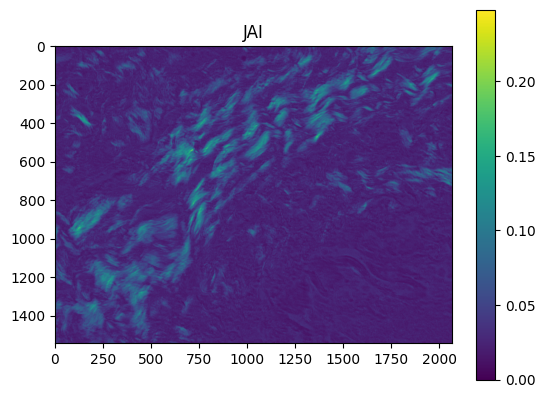

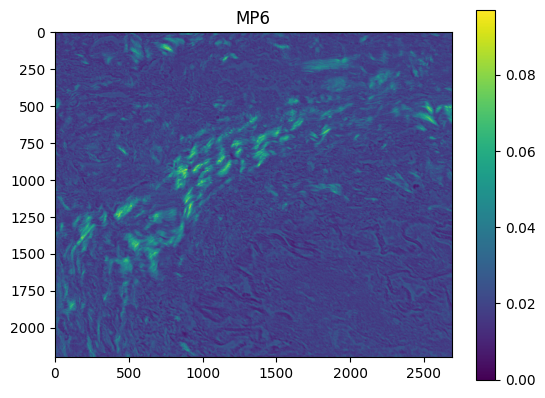

In [29]:


for pos,neg, id1  in [[jai_5,jai__5,'JAI'],[mp_5,mp__5,'MP6']]:
    pos_image, neg_image = [tf.imread(k) for k in [pos,neg]]
    biref = TifWriterUtils.ppm_angle_difference(pos_image,neg_image)
    figure()
    
    imshow(biref)
    
    title(id1)
    colorbar()
    tf.imwrite(id1+',tif',biref.astype(np.float32))    
    
    

In [ ]:
## put the images on imagej and estimated scaling around 0.77 and some rotation needed for clean processing.
bounding box at 342,512, : 1594,1190  

In [ ]:
1	MP6-1.tif	386	0.015	1626	1446.000	0	0	0	0	-25.233	384.708
2	JAI-1.tif	498	0.021	1706	1190.500	0	0	0	0	-22.123	496.557
3	MP6.tif:2	1896860	35.242	1139	1107.000	0	0	0	0	0.000	0.000
4	MP6.tif:2	1896860	35.242	1139	1107.000	342	512	1594	1190	0.000	0.000


In [46]:
from skimage.transform import resize
import numpy as np

def downscale_rgb(image, scale= 0.77):
    output_shape = (int(image.shape[0] * scale), int(image.shape[1] * scale), 3)
    return resize(image, output_shape, anti_aliasing=True, preserve_range=True).astype(image.dtype)


def downscale_(image, scale= 0.77):
    output_shape = (int(image.shape[0] * scale), int(image.shape[1] * scale))
    resized = resize(image, output_shape, anti_aliasing=True, preserve_range=True).astype(image.dtype)
    return resized


JAI (1188, 1589) float32
---
MP6 (1190, 1594) float32
---


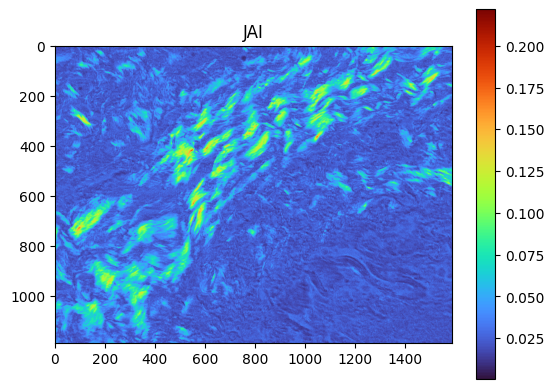

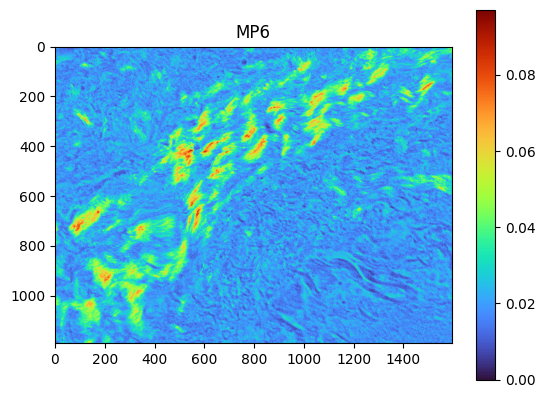

In [48]:
data = {}

for pos,neg, id1  in [[jai_5,jai__5,'JAI'],[mp_5,mp__5,'MP6']]:
    #print(pos,neg)
    pos_image, neg_image = [tf.imread(k) for k in [pos,neg]]
    #print(pos_image.shape, neg_image.shape, pos_image.dtype)
    biref = TifWriterUtils.ppm_angle_difference(pos_image,neg_image)
    #print(biref.shape)
    figure()
    if id1 =='JAI': 
        img = downscale_(biref)
    else:
        img = biref[512:512+1190,342:342+1594]
    print(id1, img.shape, img.dtype)
    imshow(img, cmap ='turbo')
    title(id1)
    colorbar()
    tf.imwrite(id1+'.tif',biref.astype(np.float32))    
    print("---")
    
    data.update({id1:img})
    

In [55]:
matplotlib.style.use('ggplot')

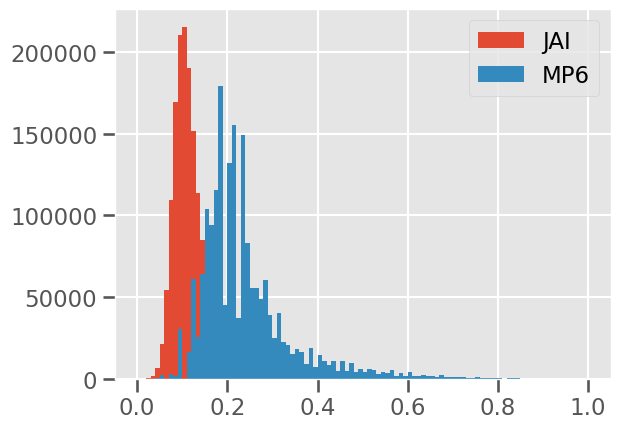

In [60]:
for k in data:
    img = data[k].ravel()
    img = (img-img.min())/(img.max()-img.min())
    hist(img.ravel(),100, label=k)
    
legend()

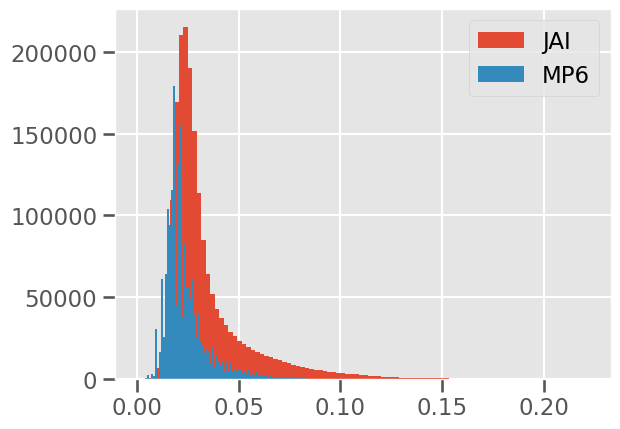

In [59]:
for k in data:
    img = data[k].ravel()
    hist(img,100, label=k)
    
legend()

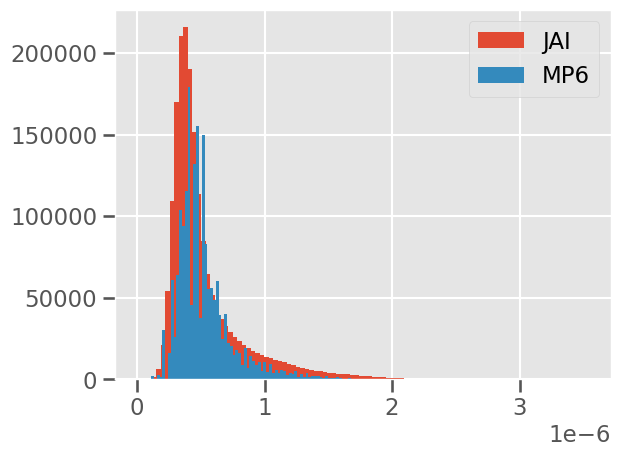

In [61]:
for k in data:
    img = data[k].ravel()
    img = img/ img.sum()
    hist(img.ravel(),100, label=k)
    
legend()

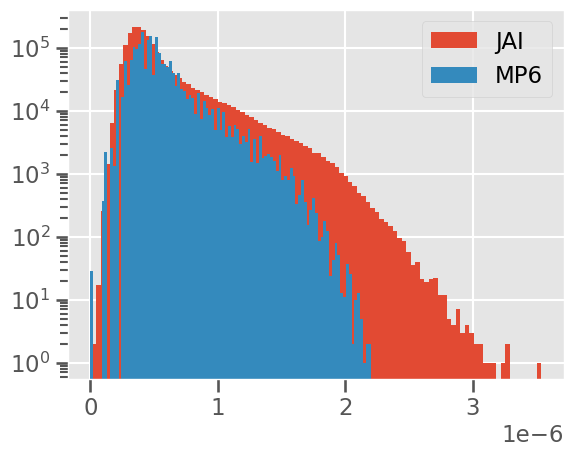

In [62]:
for k in data:
    img = data[k].ravel()
    img = img/ img.sum()
    hist(img.ravel(),100, label=k)
    
legend()
yscale('log')